# Создание математической модели

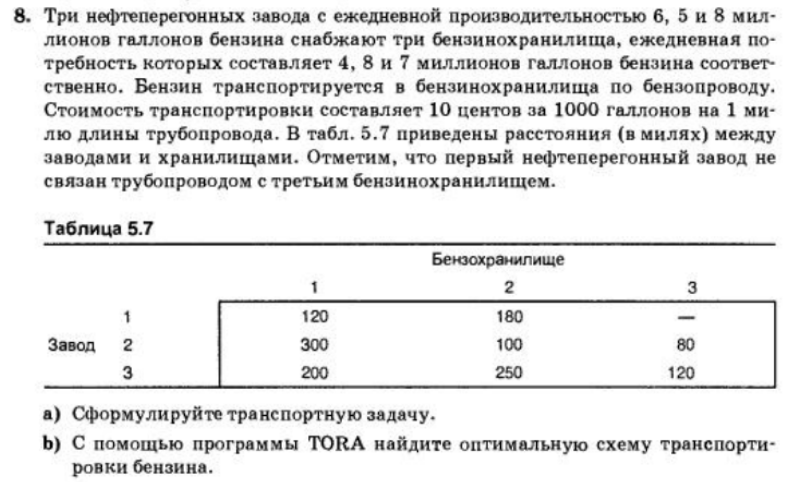

Так как стоимость транспортировки составляет 10 центов за 1000 галлонов на 1 милю, то вычислим стоимость перевозки 1 млн галлонов на 1 милю в долларах: 10 центов * 10^6 галлонов / 10^3 галлонов = 10_000 центов = 100$ за 1 милю

В связи с этим составим таблицу перевозки 1 млн галлонов на 1 милю (в тысячах долларов), т.е домножим на 100 и разделим на 1000$:

-|1ое хранилище|2е хранилище|3е хранилище|произв-ть заводов
---|---|---|---|--- 
1ый завод|12|18|-|6
2ый завод|30|10|2|5
3ый завод|20|25|12|8
потребность хранилищ|4|8|7

Теперь решим данную транспортную задачу при ограничениях производительности заводов и потребности бензохранилищ

# Решение

In [4]:
import pyomo.environ as pyo
import highspy

from itertools import product


# стоимость перевозок
costs = [[12, 18, 1e3],
         [30, 10,   8],
         [20, 25,  12]]

# производительность заводов
efficiency = [6, 5, 8]

# потребление бензохранилищ
consumption = [4, 8, 7]

model = pyo.ConcreteModel(name='simplex_method')
model.factories = pyo.RangeSet(0, 2)
model.storages = pyo.RangeSet(0, 2)

model.x = pyo.Var(model.factories, model.storages, within=pyo.NonNegativeReals)

# целевая функция
def obj_rule(model):
    return sum(costs[i][j] * model.x[i, j] for i, j in product(range(3), repeat=2))
model.obj = pyo.Objective(rule=obj_rule)

# ограничения производительности заводов
def factories_constr(model, i):
    return sum(model.x[i, j] for j in range(3)) == efficiency[i]
model.constr1 = pyo.Constraint(range(3), rule=factories_constr)

# ограничения потребности бензохранилищ
def storages_constr(model, j):
    return sum(model.x[i, j] for i in range(3)) == consumption[j]
model.constr2 = pyo.Constraint(range(3), rule=storages_constr)

# решение с помощью солвера
solver = pyo.SolverFactory('appsi_highs')
result = solver.solve(model)

model.display()

Model unknown

  Variables:
    x : Size=9, Index=factories*storages
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (0, 0) :     0 :   4.0 :  None : False : False : NonNegativeReals
        (0, 1) :     0 :   2.0 :  None : False : False : NonNegativeReals
        (0, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 0) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (1, 1) :     0 :   5.0 :  None : False : False : NonNegativeReals
        (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 0) :     0 :   0.0 :  None : False : False : NonNegativeReals
        (2, 1) :     0 :   1.0 :  None : False : False : NonNegativeReals
        (2, 2) :     0 :   7.0 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 243.0

  Constraints:
    constr1 : Size=3
        Key : Lower : Body : Upper
          0 

# Вывод

Была построена математическая модель с помощью pyomo и решена с помощью решателя highspy со следующими результатами:
- $x_{1,1}$ = 4 млн галлонов
- $x_{1,2}$ = 2 млн галлонов
- $x_{2,2}$ = 5 млн галлонов
- $x_{3,2}$ = 1 млн галлонов
- $x_{3,3}$ = 7 млн галлонов
- итоговая минимальная цена перевозок: 243_000$